# Read data from CSV files


In [1]:
import pandas as pd
import numpy as np

In [2]:
def read_csv_to_dataframe(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
filename = 'OIL.NS.csv'
df = read_csv_to_dataframe(filename)

# Calculate historical returns (return)

return = (adj close(t) - adj close(t-1))/adj close(t-1)

In [4]:
from sklearn.model_selection import train_test_split as tts

In [42]:
def get_data(filename):
    df = read_csv_to_dataframe(filename)
    return_df = df[['Date', 'Adj Close']]
    return_df['Daily Return'] = return_df['Adj Close'].pct_change()
    # Set the smoothing factor (alpha) for EMA
    alpha = 0.1
    # Calculate EMA returns
    return_df['EMA Return'] = return_df['Daily Return'].ewm(alpha=alpha, adjust=False).mean()
    current_ema_return = return_df['EMA Return'].iloc[-1]
    return_df['Predict'] = return_df['EMA Return'].shift(1)
    return_df = return_df.dropna()
    train_df, test_df = tts(return_df[['EMA Return', 'Predict']], train_size = 0.8, shuffle = False)
    x_train = train_df.drop(columns = ['Predict'])
    y_train = train_df['Predict']
    x_test= test_df.drop(columns = ['Predict'])
    y_test = test_df['Predict']
    return x_train, y_train, x_test, y_test, current_ema_return

# Model

In [43]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor as regressor
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [70]:
def linear_df(filename):
    x_train, y_train, x_test, y_test, current_ema_return = get_data(filename)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print(model.score(x_test, y_test))
    predict = model.predict(x_test)
    predict_df = pd.DataFrame({'predict': predict,'real':y_test}, index = None)
    tmr_predict = model.predict([[current_ema_return]])
    print("Tmr predicted ema return: ", tmr_predict)
    print("Tmr return: ", (tmr_predict - 0.8*current_ema_return)/0.2)
    return predict_df

def xgb_df(filename):
    x_train, y_train, x_test, y_test, current_ema_return = get_data(filename)
    x_train, x_val, y_train, y_val = tts(x_train, y_train, train_size = 0.8, shuffle = False) 
    model = regressor(learning_rate = 0.06, max_depth = 6, n_estimators = 100)
    model.fit(x_train,y_train, eval_set = [(x_val, y_val)], eval_metric = 'rmse', verbose = False)
    print(model.score(x_test, y_test))
    predict = model.predict(x_test)
    predict_df = pd.DataFrame({'predict': predict,'real':y_test},index = y_test.index)
    df = pd.DataFrame({'EMA Return': [current_ema_return]})
    tmr_predict = model.predict(df)
    print("Tmr predicted ema return: ", tmr_predict)
    print("Tmr return: ", (tmr_predict - 0.8*current_ema_return)/0.2)
    return predict_df

0.789330671076056
Tmr predicted ema return:  [0.00443464]
Tmr return:  [0.00200641]


/tmp/ipykernel_109870/2277710716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['Daily Return'] = return_df['Adj Close'].pct_change()
/tmp/ipykernel_109870/2277710716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['EMA Return'] = return_df['Daily Return'].ewm(alpha=alpha, adjust=False).mean()
/tmp/ipykernel_109870/2277710716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<AxesSubplot:>

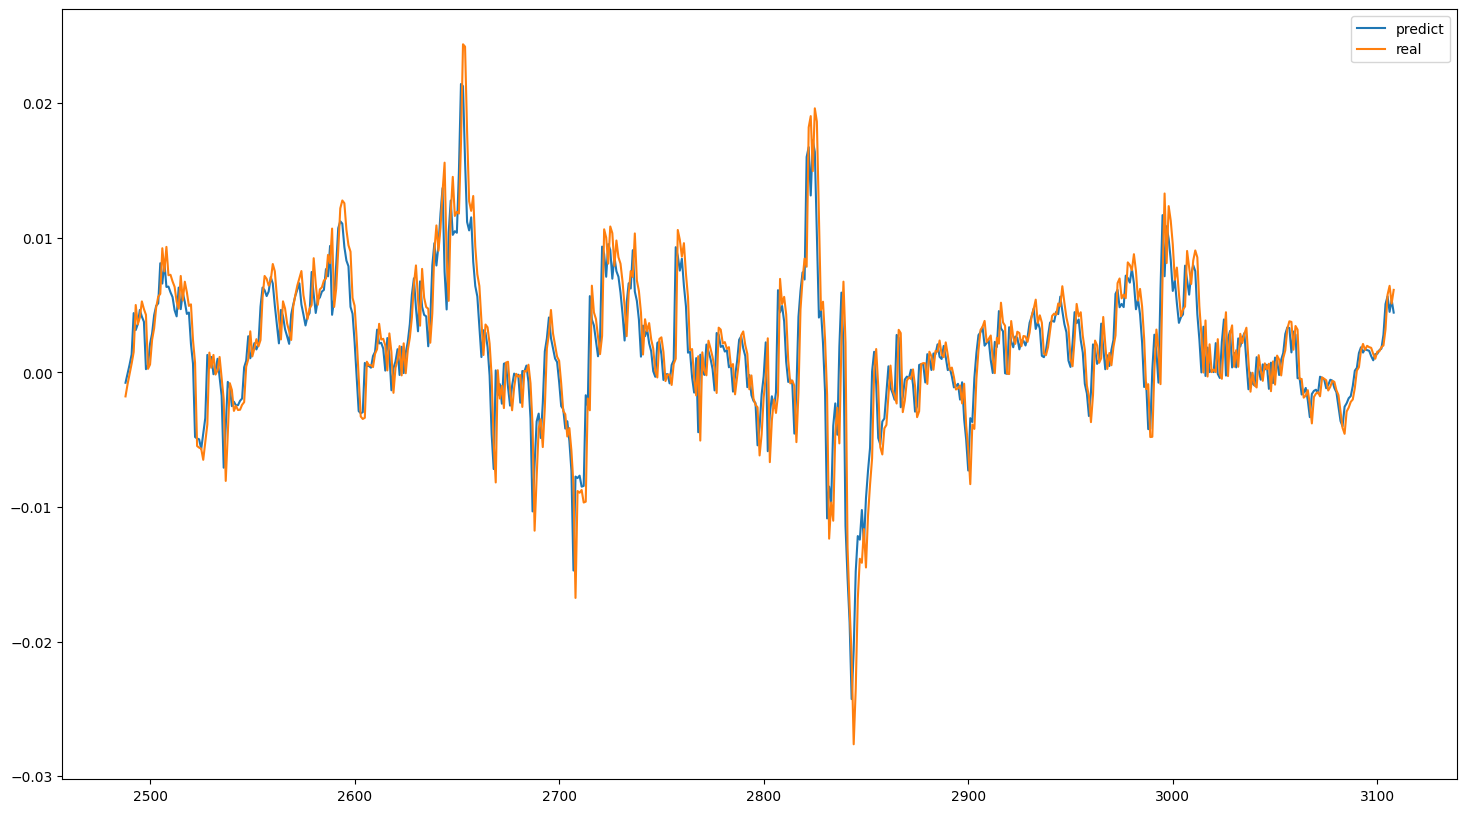

In [64]:
linear_df('OIL.NS.csv')[['predict', 'real']].plot(figsize = (18,10))

0.7710696382726359
Tmr predicted ema return:  [0.00423739]
Tmr return:  [0.00210512]


/tmp/ipykernel_109870/2277710716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['Daily Return'] = return_df['Adj Close'].pct_change()
/tmp/ipykernel_109870/2277710716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['EMA Return'] = return_df['Daily Return'].ewm(alpha=alpha, adjust=False).mean()
/tmp/ipykernel_109870/2277710716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<AxesSubplot:>

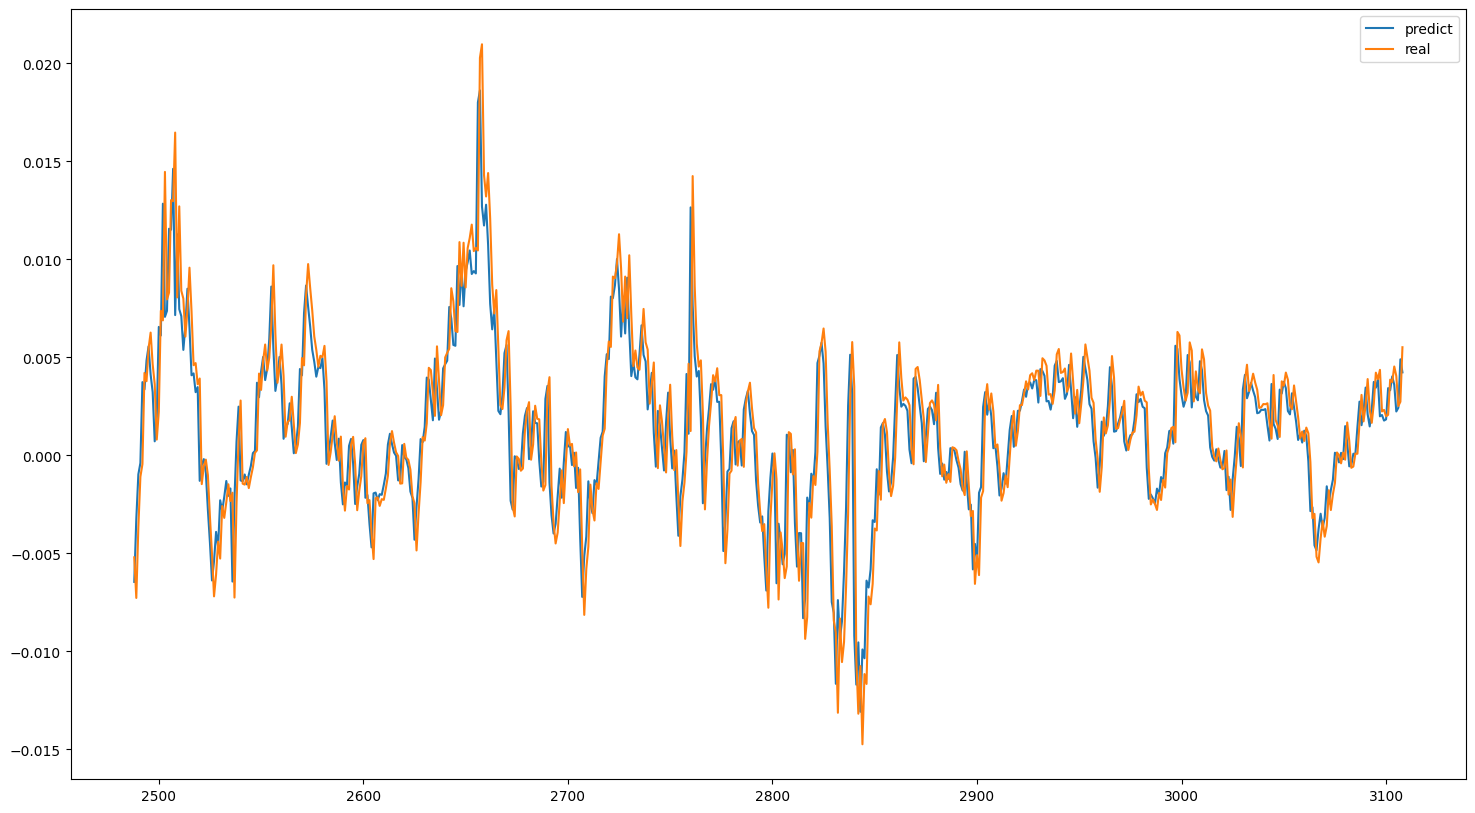

In [57]:
linear_df('ONGC.NS.csv')[['predict', 'real']].plot(figsize = (18,10))

/tmp/ipykernel_109870/2277710716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['Daily Return'] = return_df['Adj Close'].pct_change()
/tmp/ipykernel_109870/2277710716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['EMA Return'] = return_df['Daily Return'].ewm(alpha=alpha, adjust=False).mean()
/tmp/ipykernel_109870/2277710716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


0.7242968238228134
Tmr predicted ema return:  [0.00554218]
Tmr return:  [0.00754411]


<AxesSubplot:>

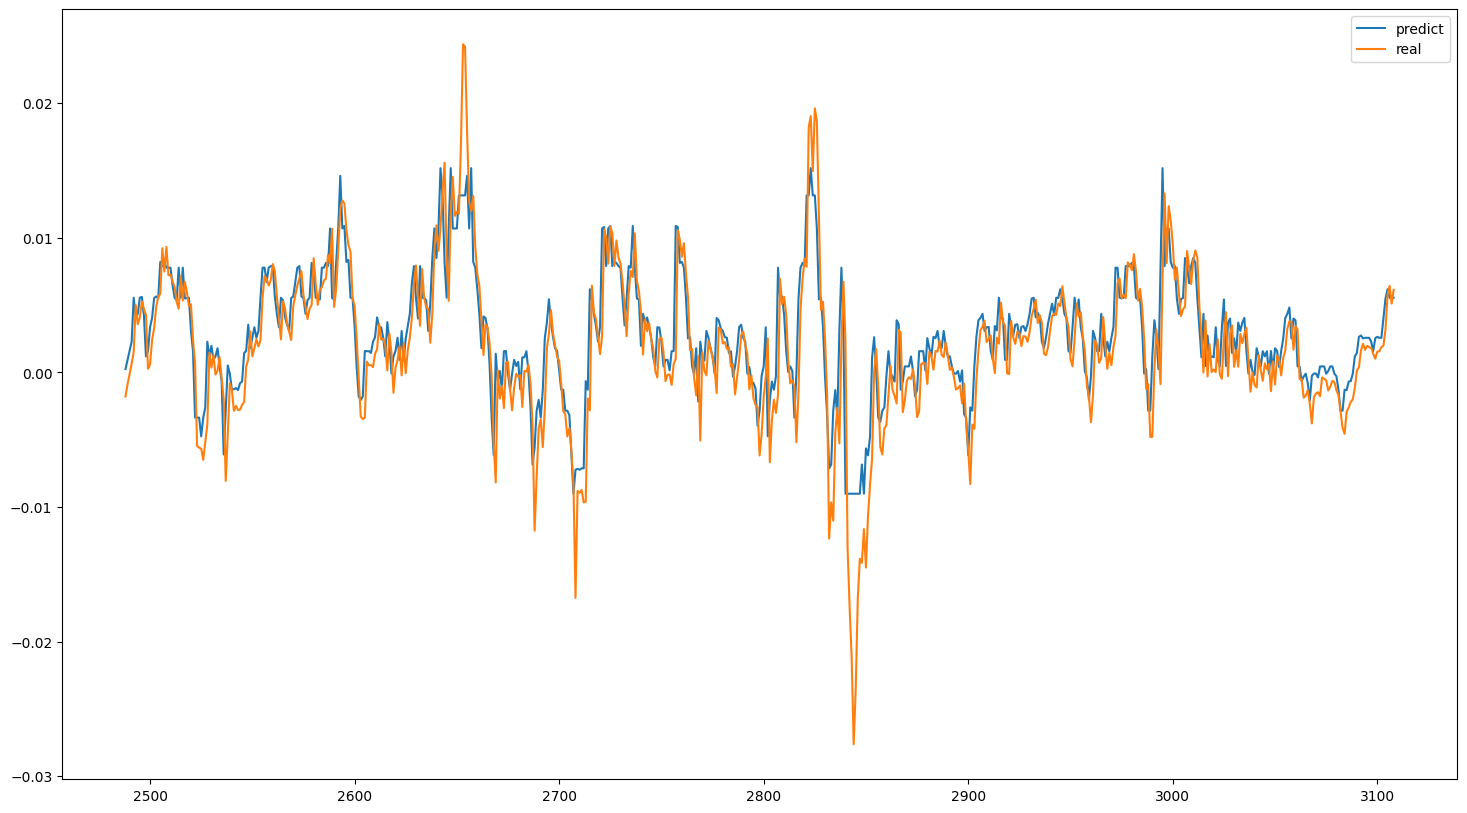

In [72]:
xgb_df('OIL.NS.csv')[['predict', 'real']].plot(figsize = (18,10))

/tmp/ipykernel_109870/2277710716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['Daily Return'] = return_df['Adj Close'].pct_change()
/tmp/ipykernel_109870/2277710716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['EMA Return'] = return_df['Daily Return'].ewm(alpha=alpha, adjust=False).mean()
/tmp/ipykernel_109870/2277710716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


0.7128827205069663
Tmr predicted ema return:  [0.00516183]
Tmr return:  [0.00672733]


<AxesSubplot:>

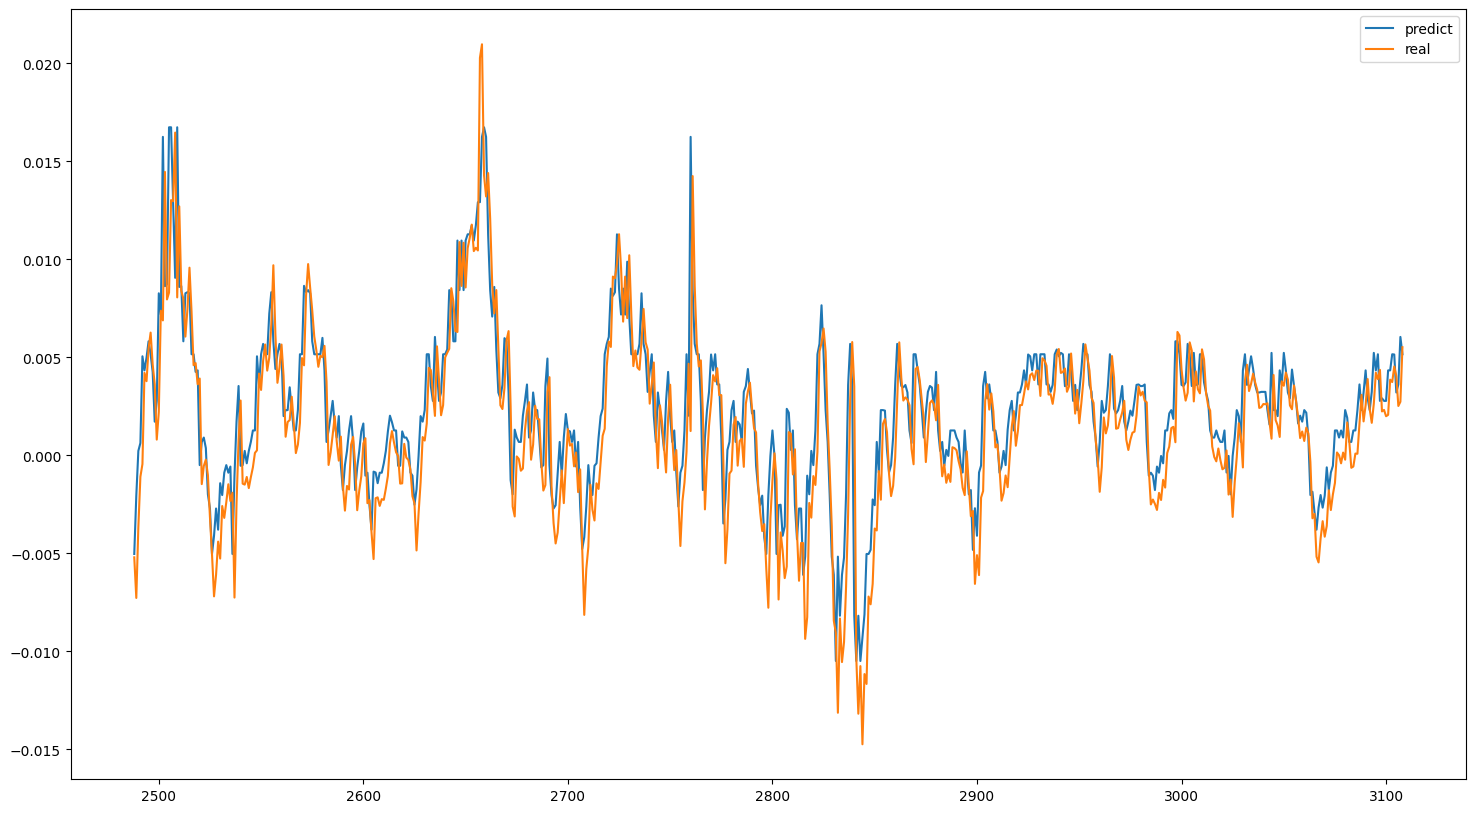

In [73]:
xgb_df('ONGC.NS.csv')[['predict', 'real']].plot(figsize = (18,10))